# CA04 – Ensemble Models

## Data Source and Contents

In [76]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
# read dataset
df = pd.read_csv('census_data.csv')

In [78]:
# inspect dataset
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [79]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [80]:
# encode values
df.hours_per_week_bin = le.fit_transform(df.hours_per_week_bin) 
df.occupation_bin = le.fit_transform(df.occupation_bin)
df.msr_bin = le.fit_transform(df.msr_bin) 
df.capital_gl_bin = le.fit_transform(df.capital_gl_bin) 
df.race_sex_bin = le.fit_transform(df.race_sex_bin) 
df.education_num_bin = le.fit_transform(df.education_num_bin) 
df.education_bin = le.fit_transform(df.education_bin)  
df.workclass_bin = le.fit_transform(df.workclass_bin) 
df.age_bin = le.fit_transform(df.age_bin) 
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3,test,0
48838,1,1,0,0,1,1,1,0,2,test,0
48839,3,4,2,0,2,2,2,1,3,test,0
48840,1,1,0,2,2,2,2,1,4,test,0


In [81]:
# split dataset intro training and testing data
x_train = df[df.flag == 'train'].drop(['flag', 'y'], axis = 1)
x_test = df[df.flag == 'test'].drop(['flag', 'y'], axis = 1)
y_train = df[df.flag == 'train']['y']
y_test = df[df.flag == 'test']['y']

## Finding Optimal Value of a Key Hyper-Parameter

In [82]:
from sklearn.tree import DecisionTreeClassifier

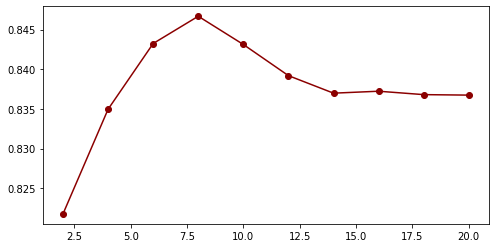

In [83]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
 model = DecisionTreeClassifier(max_depth = trees, random_state = 101)
 model.fit(x_train, y_train)
 y_pred = model.predict(x_test)
 accuracy = np.mean(y_test == y_pred)
 results.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(results, max_depth_options).plot(color = "darkred", marker = "o")

## Building a Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestClassifier

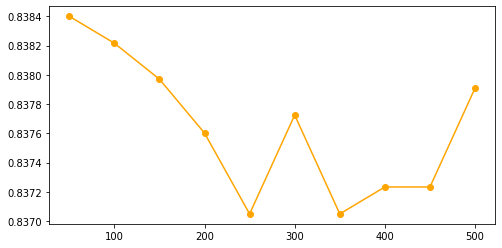

In [100]:
results_rf = []
n_estimator_values = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator_values:
  model_rf = RandomForestClassifier(n_estimators = trees, random_state = 101)
  model_rf.fit(x_train, y_train)
  y_pred_rf = model_rf.predict(x_test)
  accuracy_rf = np.mean(y_test == y_pred_rf)
  results_rf.append(accuracy_rf)

plt.figure(figsize = (8,4))
pd.Series(results_rf, n_estimator_values).plot(color = "orange", marker = "o")

## AdaBoost Model

In [86]:
from sklearn.ensemble import AdaBoostClassifier

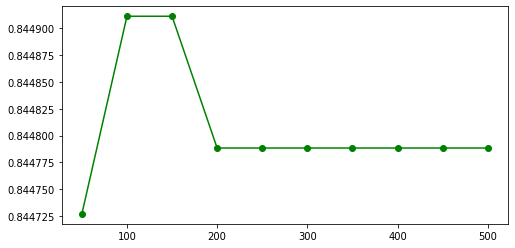

In [101]:
results_ab = []
n_estimator_values = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator_values:
  model_ab = AdaBoostClassifier(n_estimators = trees, random_state = 101)
  model_ab.fit(x_train, y_train)
  y_pred_ab = model_ab.predict(x_test)
  accuracy_ab = np.mean(y_test == y_pred_ab)
  results_ab.append(accuracy_ab)

plt.figure(figsize = (8,4))
pd.Series(results_ab, n_estimator_values).plot(color = "green", marker = "o")

## Gradient Boost Model

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

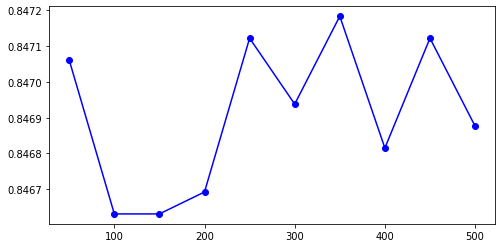

In [102]:
results_gb = []
n_estimator_values = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator_values:
  model_gb = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
  model_gb.fit(x_train, y_train)
  y_pred_gb = model_gb.predict(x_test)
  accuracy_gb = np.mean(y_test == y_pred_gb)
  results_gb.append(accuracy_gb)

plt.figure(figsize = (8,4))
pd.Series(results_gb, n_estimator_values).plot(color = "blue", marker = "o")

## XGB Model

In [90]:
from xgboost import XGBClassifier

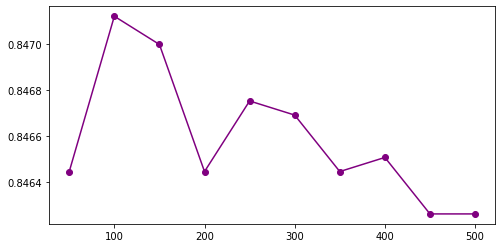

In [103]:
results_xgb = []
n_estimator_values = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator_values:
  model_xgb = XGBClassifier(n_estimators = trees, random_state = 101)
  model_xgb.fit(x_train, y_train)
  y_pred_xgb = model_xgb.predict(x_test)
  accuracy_xgb = np.mean(y_test == y_pred_xgb)
  results_xgb.append(accuracy_xgb)

plt.figure(figsize = (8,4))
pd.Series(results_xgb, n_estimator_values).plot(color = "purple", marker = "o")

## Compare Performance

In [92]:
# create table
comparison = pd.DataFrame(index = ['Accuracy', 'AUC'], columns = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'])

In [93]:
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [94]:
# create list to append accuracy scores
accuracy_performance = []
accuracy_performance.append(accuracy_rf)
accuracy_performance.append(accuracy_ab)
accuracy_performance.append(accuracy_gb)
accuracy_performance.append(accuracy_xgb)
accuracy_performance

# create list to append AUC scores
auc_performance = []
auc_performance.append(roc_auc_score(y_test, y_pred_rf))
auc_performance.append(roc_auc_score(y_test, y_pred_ab))
auc_performance.append(roc_auc_score(y_test, y_pred_gb))
auc_performance.append(roc_auc_score(y_test, y_pred_xgb))
auc_performance

[0.7467807325079494,
 0.7460076328264228,
 0.7609339548491469,
 0.7591849222822954]

In [95]:
comparison.loc['Accuracy'] = accuracy_performance
comparison.loc['AUC'] = auc_performance
comparison

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.837602,0.844788,0.846877,0.846263
AUC,0.746781,0.746008,0.760934,0.759185
